# Predicting Housing Prices - USA

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
USAhousing = pd.read_csv('USA_Housing-Copy1.csv')

In [7]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Checking out the data

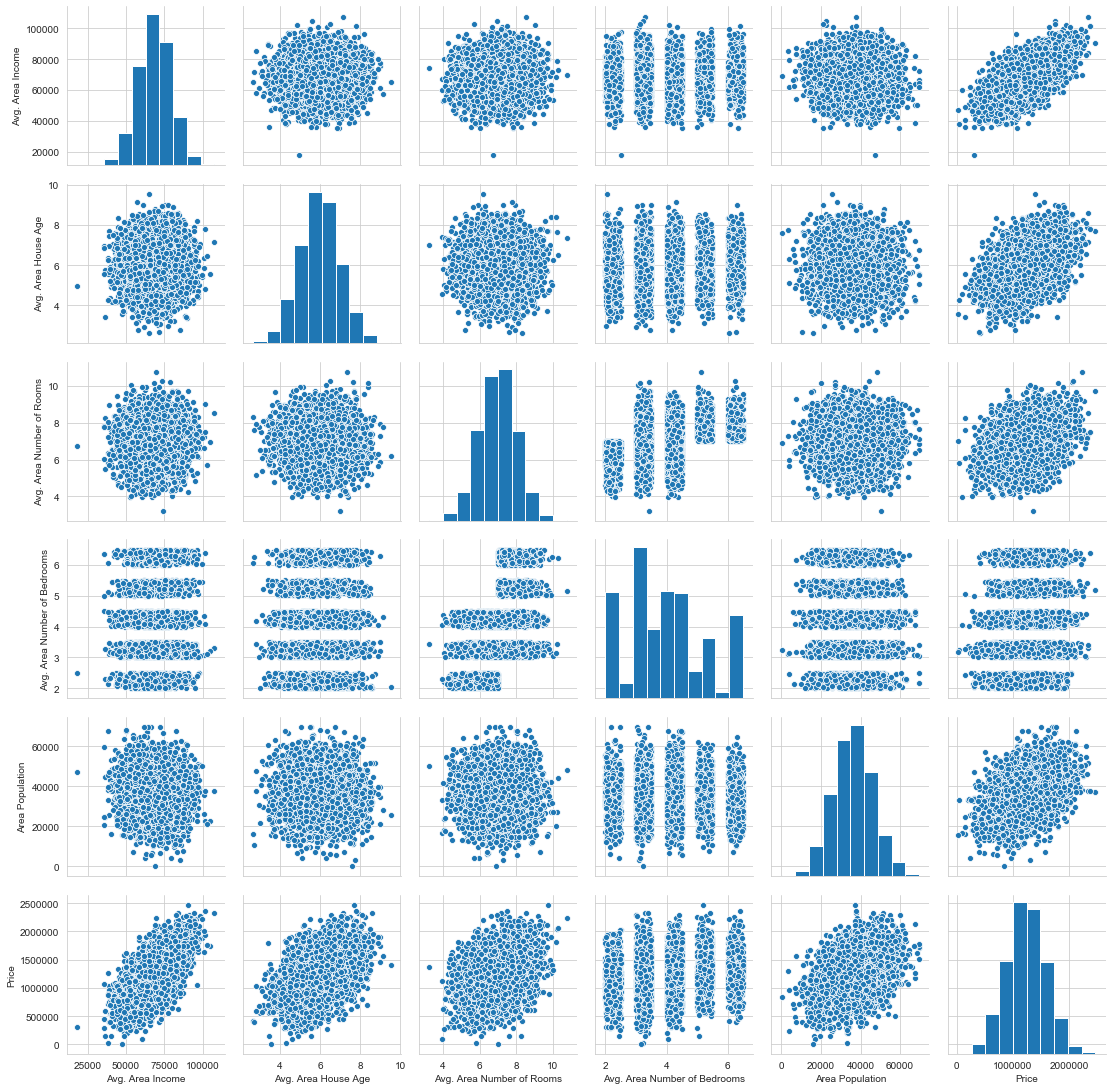

In [6]:
sns.pairplot(USAhousing);

##### Checking the distribution of my target variable

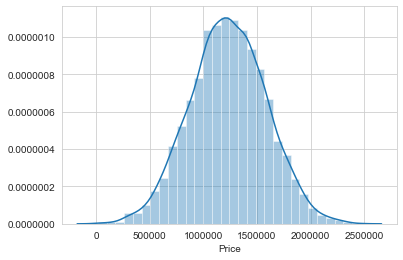

In [5]:
sns.distplot(USAhousing['Price'], bins=30);

##### Checking the correlation between the features

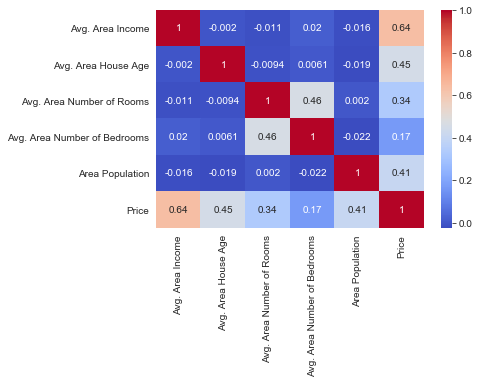

In [4]:
sns.heatmap(USAhousing.corr(), cmap='coolwarm', annot=True);

We can see that all features have a positive correlation with the target variable. Therefore, all will be used for predicting the Price.

## Using Linear Regression to Solve it

In [7]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

#### Spliting the data into a training set and a testing set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Training the Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Evaluation

The model will be evaluated by checking out its coefficients.

In [13]:
print(lm.intercept_)

-2640159.796851911


In [14]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


#### Interpreting the coefficients:

Avg. Area Income: 1 unit increase is associated with an *increase of $21.52*;

Avg. Area House Age: 1 unit increase is associated with an *increase of $164883.28*;

Avg. Area Number of Rooms: 1 unit is associated with an *increase of $122368.67*;

Avg. Area Number of Bedrooms: 1 unit is associated with an *increase of $2233.80*;

Area Population: 1 unit is associated with an *increase of $15.15*.

## Predictions

In [15]:
predictions = lm.predict(X_test)

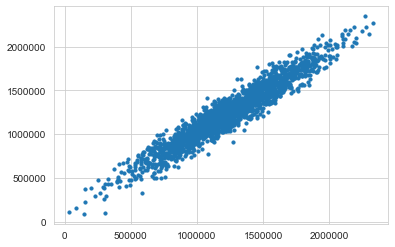

In [16]:
plt.scatter(y_test,predictions, s=10)

#### Residual Histogram

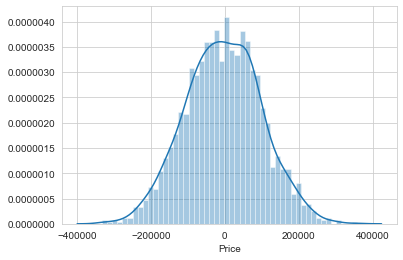

In [17]:
sns.distplot((y_test-predictions),bins=50);

### Regression Evaluation Metrics

In [18]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score : ',metrics.r2_score(y_test, predictions))      
print('Variance: ',metrics.explained_variance_score(y_test,predictions))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153
R2 score :  0.91768240096492
Variance:  0.9178179926151797
